In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

df = pd.read_csv("/Users/leo/Programming/PLR/Leo/data/dataset_2.csv").drop('Unnamed: 0', axis=1)

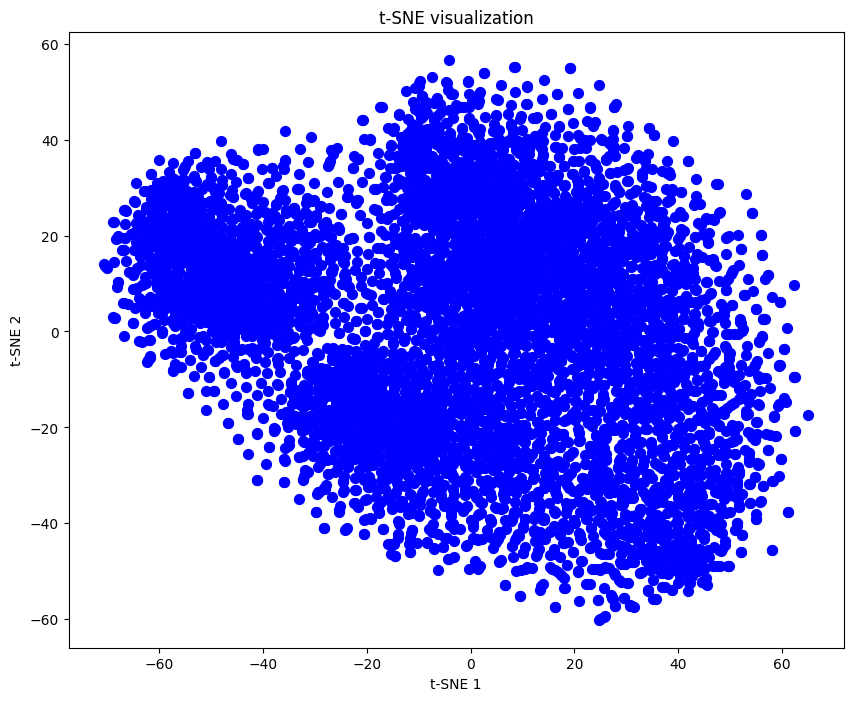

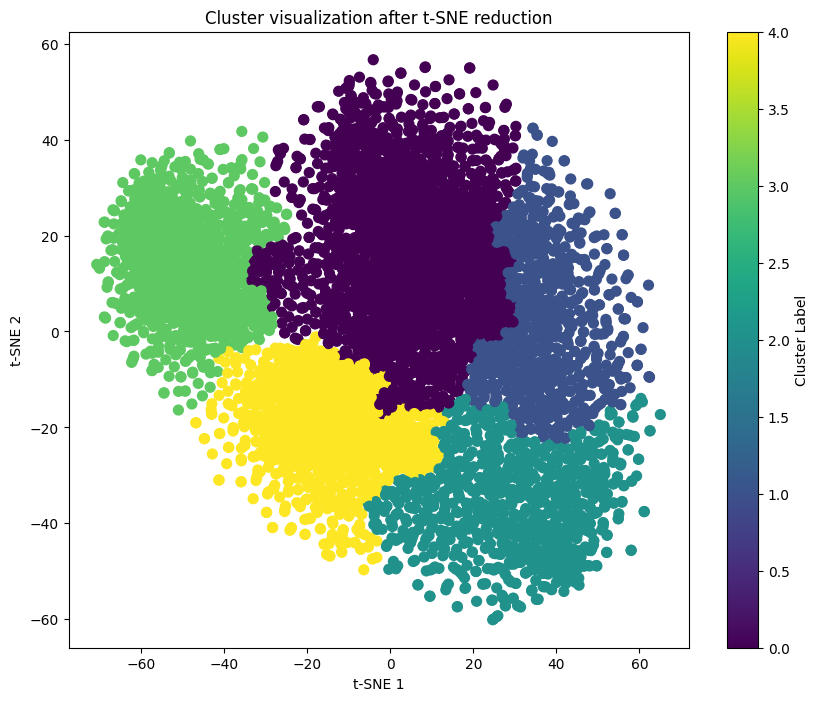

In [28]:
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd

# Apply t-SNE with adjusted perplexity
tsne = TSNE(n_components=2, perplexity=20, learning_rate=200)
tsne_results = tsne.fit_transform(df)

# Plotting the scatterplot
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c='blue', s=50)
plt.title('t-SNE visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# Apply Agglomerative Clustering
n_clusters = 5
afc = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = afc.fit_predict(tsne_results)

# Add cluster labels to the DataFrame
df['cluster'] = cluster_labels

# Plotting the scatterplot
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('Cluster visualization after t-SNE reduction')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [29]:
# Add cluster labels to the DataFrame
df['cluster'] = cluster_labels
clusters_df = df.reset_index()
clusters_df = clusters_df[['index', 'cluster']]
clusters_df.rename(columns={'cluster': 'clusters'}, inplace=True)

# Save to CSV
clusters_df.to_csv('clusters.csv', index=False)


In [31]:
df.shape

(6031, 167)

In [32]:
#count nuinique values in each cluster
df.groupby('cluster').nunique()

,Symptom_Memory_no_new_memories,Symptom_Memory_forget_tasks,Symptom_Memory_other,Symptom_Cognitive_Functioning_thinking,Symptom_Cognitive_Functioning_executive,Symptom_Cognitive_Functioning_fastthoughts,Symptom_Cognitive_Functioning_agnosia,Symptom_Cognitive_Functioning_other,Symptom_Speech_difficulty_finding_words,Symptom_Speech_difficulty_communicating_verbally,...,Demographics_Age_Cleaned_40-49,Demographics_Age_Cleaned_50-59,Demographics_Age_Cleaned_60-69,Demographics_Age_Cleaned_70-79,Demographics_Age_Cleaned_80+,Grouped_Neuro_Sensory,Grouped_Cognitive_Memory,Grouped_Gastrointestinal,Grouped_Respiratory_Cardiac,Grouped_Eye_Vision
cluster,,,,,,,,,,,,,,,,,,,,,
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,1,1,2,2,2,2,2
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,1,2,2,2,2,2
3,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [33]:
df = pd.read_csv("clusters.csv")

In [34]:
df

,index,clusters
0,0,3
1,1,2
2,2,0
3,3,1
4,4,1
...,...,...
6026,6026,4
6027,6027,0
6028,6028,1
6029,6029,4
